In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [19]:
df = pd.read_csv("/home/aryan/AI/Project 2/data/digital_habits_vs_mental_health.csv")

In [20]:
df

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
0,10.3,2,5.3,4.4,10,5
1,6.5,5,3.5,6.2,8,8
2,9.1,4,2.8,6.6,7,8
3,6.5,3,2.5,6.5,7,9
4,2.1,3,1.2,7.8,2,10
...,...,...,...,...,...,...
99995,5.0,4,1.8,4.5,10,9
99996,6.4,3,3.1,5.4,10,5
99997,3.7,3,1.5,8.3,4,10
99998,10.6,2,5.3,7.2,9,9


## 🧭 Context
The rapid proliferation of smartphones and addictive short-form content has dramatically changed the way Gen Z interacts with the world. According to studies by the American Psychological Association (APA) and surveys by Pew Research Center, increased screen time and social media usage are associated with altered sleep cycles, reduced attention spans, and elevated stress levels in adolescents and young adults.

With mental health concerns on the rise globally—especially post-pandemic—there is growing interest in using data-driven methods to monitor, analyze, and potentially predict mental health trends based on lifestyle variables. This dataset provides a safe and ethical foundation for conducting such investigations without infringing on actual personal health data.

| **Column Name**               | **Data Type** | **Description**                                                                 |
|------------------------------|---------------|---------------------------------------------------------------------------------|
| `screen_time_hours`          | `float64`     | Total daily screen time across all digital devices (in hours).                 |
| `social_media_platforms_used`| `int64`       | Number of different social media platforms used daily.                         |
| `hours_on_TikTok`            | `float64`     | Daily time spent specifically on TikTok (in hours).                            |
| `sleep_hours`                | `float64`     | Average number of hours the person sleeps per day.                             |
| `stress_level`               | `int64`       | Perceived stress level on a likely scale of 1–10.                              |
| `mood_score`                 | `int64`       | Mood rating, likely on a scale of 1–10, where higher is better.                |


In [21]:
df.drop(columns="mood_score", axis=1, inplace=True)
X = df.drop(columns=["stress_level"], axis=1)
y = df["stress_level"]

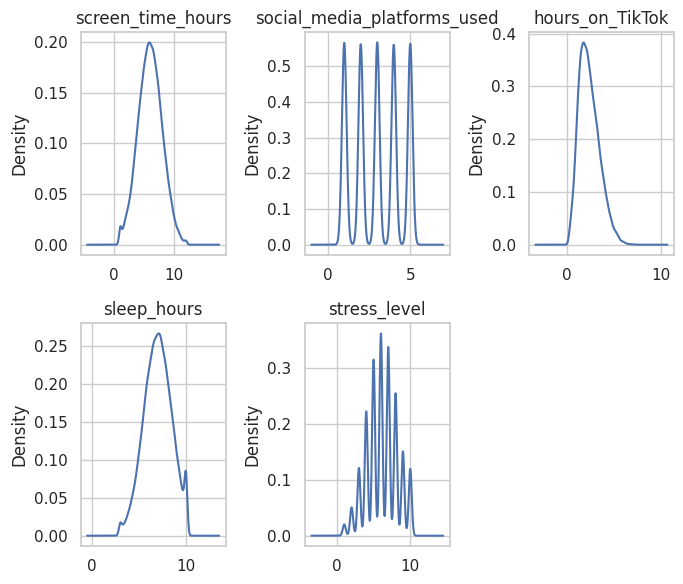

In [22]:
plt.figure(figsize=(7,6))
for idx, col in enumerate(df.columns):
    plt.subplot(2, 3, idx+1)
    df[col].plot(kind="kde")
    plt.title(col)
plt.tight_layout()
plt.show()

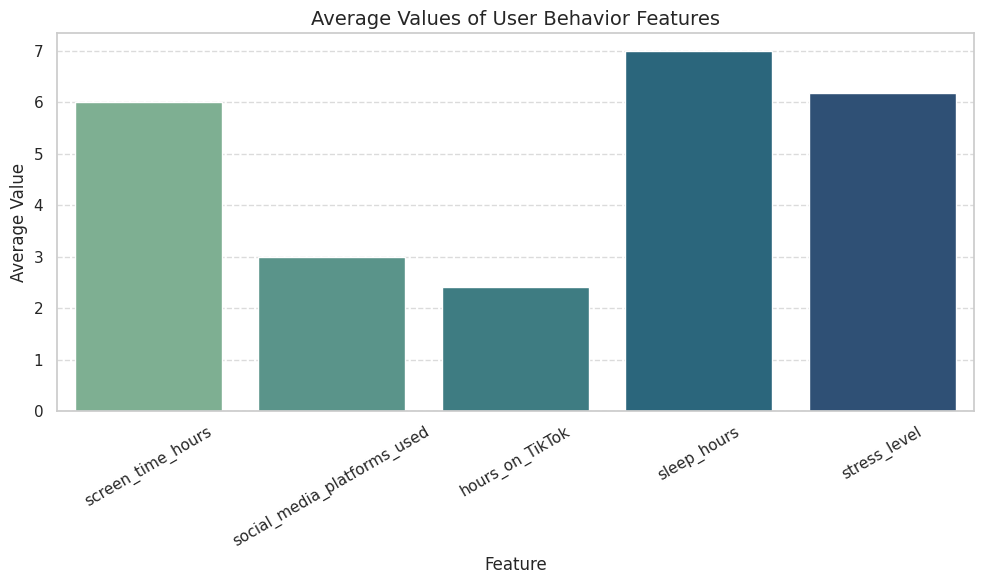

In [23]:
averages = df.mean()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=averages.index, y=averages.values, palette="crest")

# Add labels and formatting
plt.title("Average Values of User Behavior Features", fontsize=14)
plt.ylabel("Average Value")
plt.xlabel("Feature")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

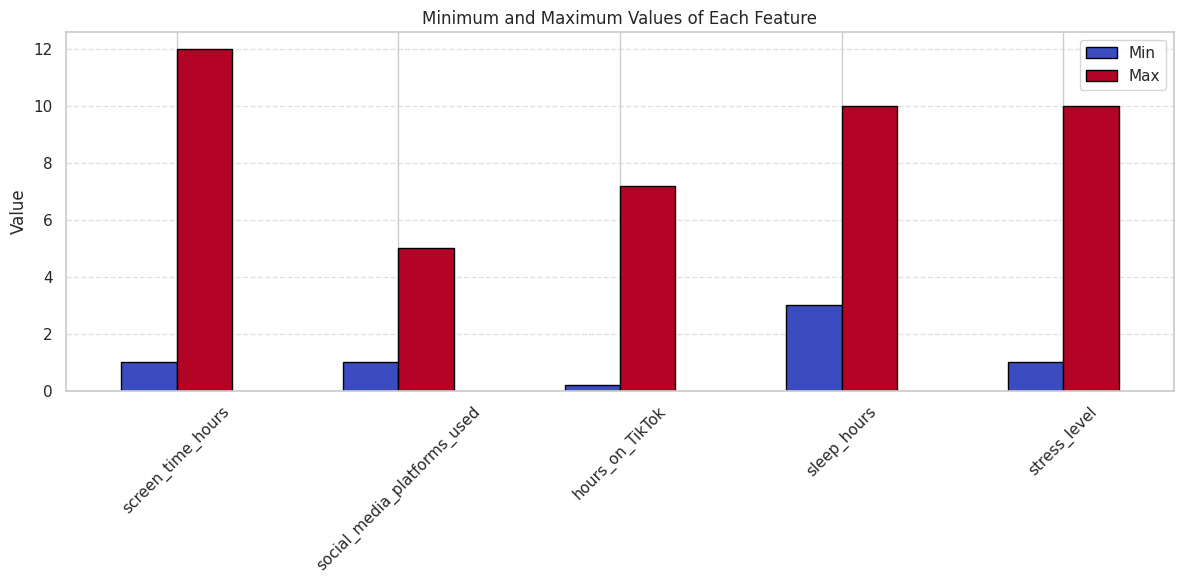

In [24]:
min_vals = df.min()
max_vals = df.max()

# Create a DataFrame for visualization
stats_df = pd.DataFrame({
    'Min': min_vals,
    'Max': max_vals
})

# Plot
stats_df.plot(kind='bar', figsize=(12, 6), colormap='coolwarm', edgecolor='black')
plt.title("Minimum and Maximum Values of Each Feature")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

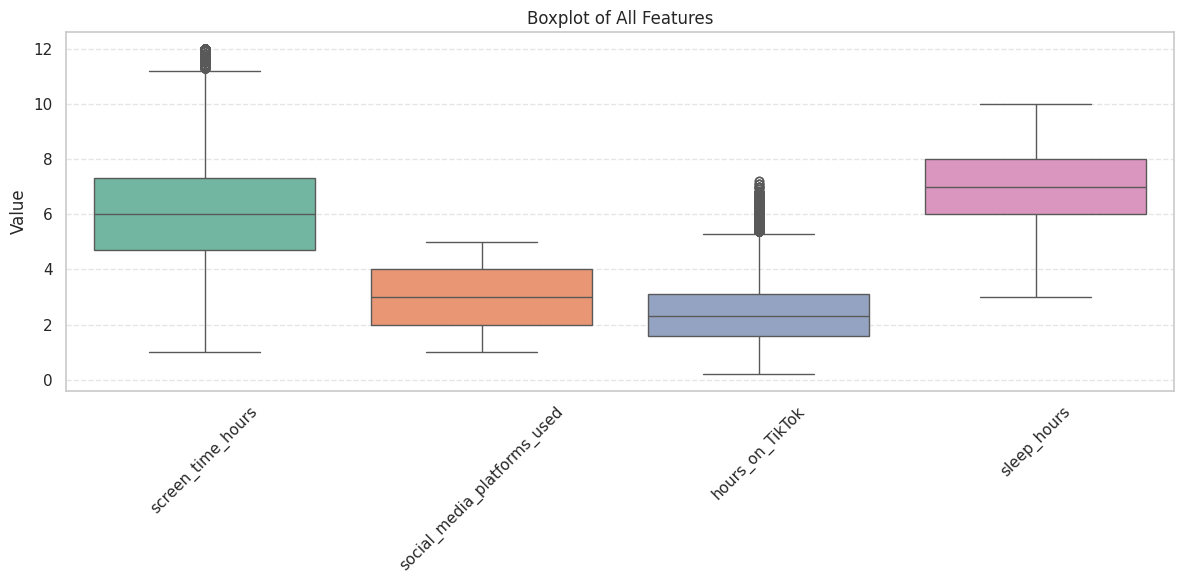

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X, palette="Set2")

plt.title("Boxplot of All Features")
plt.xticks(rotation=45)
plt.ylabel("Value")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [26]:
cols_to_cap = ['screen_time_hours', 'hours_on_TikTok']

for col in cols_to_cap:
    mean = df[col].mean()
    std = df[col].std()
    
    # Define 3σ bounds
    lower = mean - 3 * std
    upper = mean + 3 * std
    
    # Cap values
    df[col] = df[col].clip(lower=lower, upper=upper)

    print(f"Capped outliers in '{col}' to [{lower:.2f}, {upper:.2f}]")


Capped outliers in 'screen_time_hours' to [0.04, 11.96]
Capped outliers in 'hours_on_TikTok' to [-0.84, 5.64]


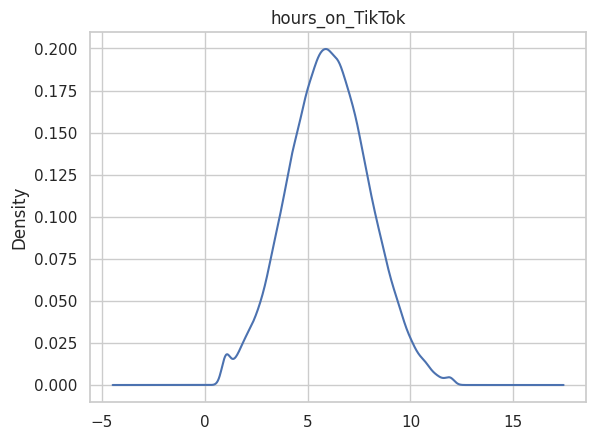

In [27]:
df["screen_time_hours"].plot(kind="kde")
plt.title(col)
plt.show()

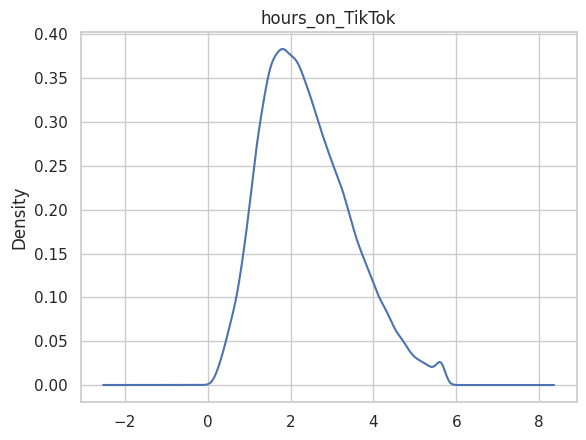

In [28]:
df["hours_on_TikTok"].plot(kind="kde")
plt.title(col)
plt.show()

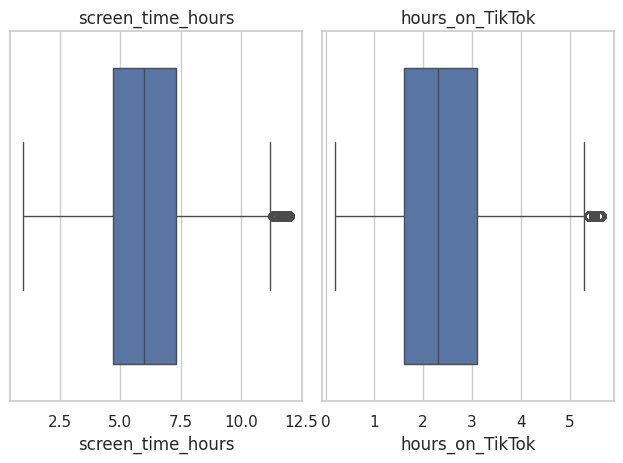

In [29]:
for idx, col in enumerate(cols_to_cap):
    plt.subplot(1,2, idx+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

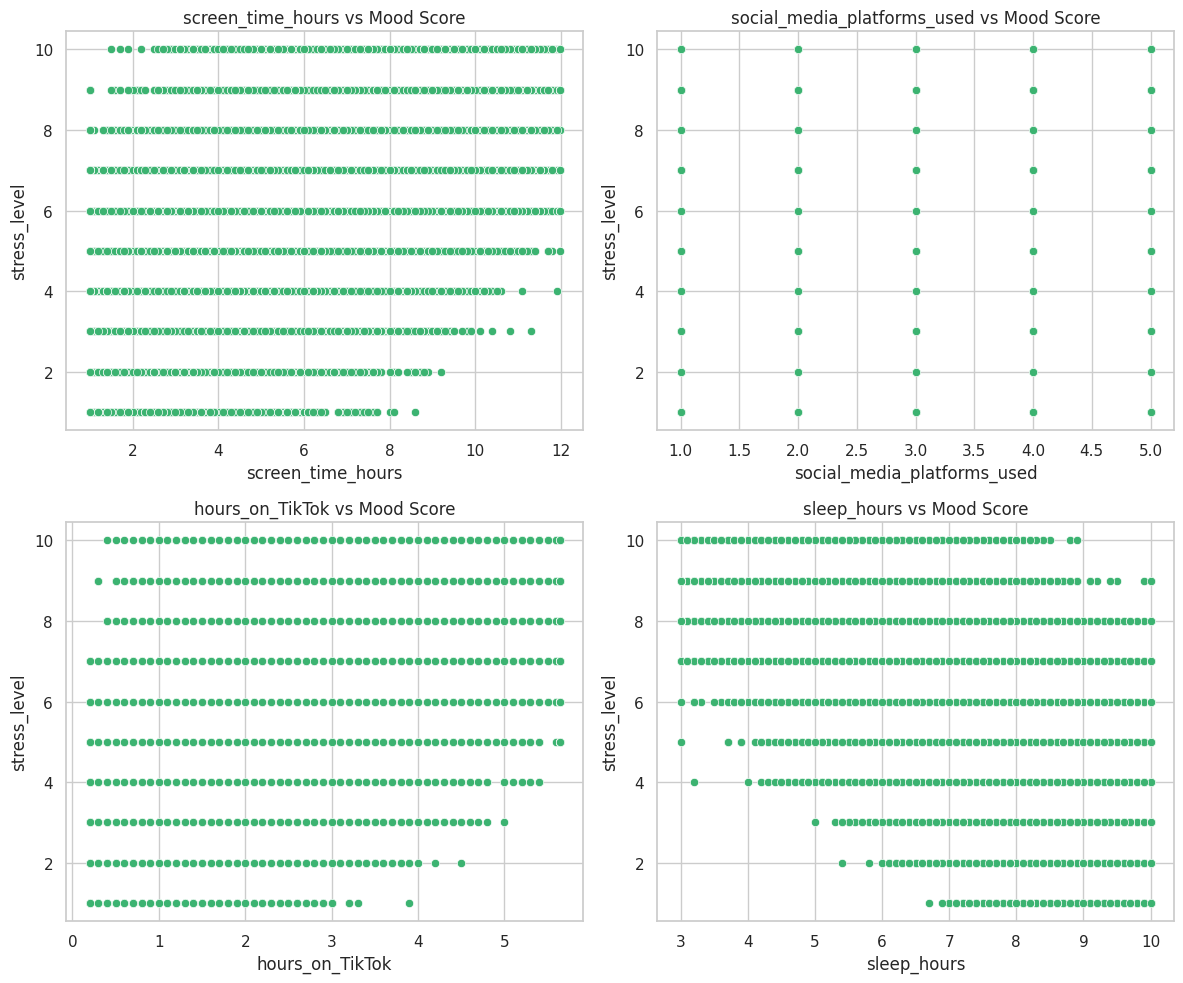

In [30]:
features = df.columns.drop("stress_level")

# Set plot style
sns.set_theme(style="whitegrid")

# Create subplots
num_features = len(features)
cols = 2
rows = (num_features + 1) // cols

plt.figure(figsize=(12, 5 * rows))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(data=df, x=feature, y="stress_level", color="mediumseagreen")
    plt.title(f"{feature} vs Mood Score")
    plt.xlabel(feature)
    plt.ylabel("stress_level")

plt.tight_layout()
plt.show()

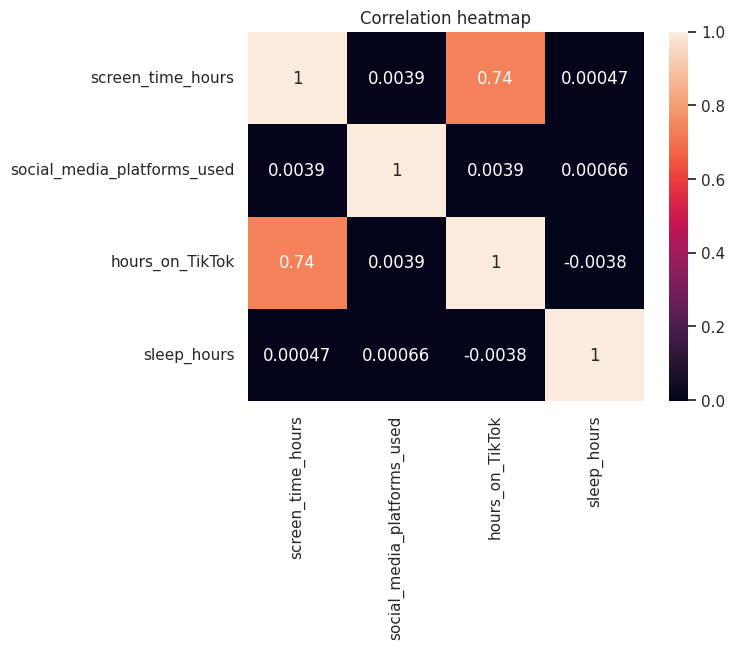

In [31]:
sns.heatmap(X.corr(), annot=True)
plt.title("Correlation heatmap")
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

def best_model(X_train, X_test, y_train, y_test):
    warnings.filterwarnings("ignore", category=UserWarning)

    models = {
        "RandomForest": RandomForestRegressor(random_state=42),
        "Bagging": BaggingRegressor(random_state=42),
        "LinearRegression": LinearRegression(),
        "XGBoost": XGBRegressor(tree_method="hist", device="cuda", random_state=42)
    }

    r2_scores = {}

    for name, model in models.items():
        model.fit(X_train.to_numpy(), y_train.to_numpy())
        preds = model.predict(X_test.to_numpy())
        r2 = r2_score(y_test, preds)
        r2_scores[name] = r2
        print(f"{name} R² Score: {r2:.4f}")

    best_model = max(r2_scores, key=r2_scores.get)
    print(f"\nBest Model: {best_model} with R² Score: {r2_scores[best_model]:.4f}")

    return best_model, models[best_model], r2_scores


In [34]:
best_model(X_train, X_test, y_train, y_test)

RandomForest R² Score: 0.7046
Bagging R² Score: 0.6873
LinearRegression R² Score: 0.7512
XGBoost R² Score: 0.7481

Best Model: LinearRegression with R² Score: 0.7512


('LinearRegression',
 LinearRegression(),
 {'RandomForest': 0.7045682127798953,
  'Bagging': 0.6872620962608162,
  'LinearRegression': 0.7512201453146216,
  'XGBoost': 0.7481276988983154})

In [35]:
xgb = XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist',           # modern, GPU-compatible tree method
    device='cuda',                # use GPU
    random_state=42,
    verbosity=0                   # silence warnings
)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid Search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit
grid_search.fit(X_train.to_numpy(), y_train.to_numpy())

# Best model and prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test.to_numpy())

# R² score
r2 = r2_score(y_test, y_pred)

# Output results
print("\n✅ Best Parameters:")
print(grid_search.best_params_)
print(f"\n🎯 R² Score on Test Data: {r2:.4f}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits

✅ Best Parameters:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

🎯 R² Score on Test Data: 0.7539


In [36]:
import joblib
joblib.dump(best_model, "xgbreg")

['xgbreg']

In [37]:
X_train.columns

Index(['screen_time_hours', 'social_media_platforms_used', 'hours_on_TikTok',
       'sleep_hours'],
      dtype='object')